# 02_chunking_experiments.ipynb

## FinWise — Chunking Experiments

### Goal

- Test and compare multiple chunking strategies for cleaned PDF text.
- Compare **chunk sizes and overlaps**.
- Generate chunks ready for embeddings and RAG experiments.


# 1️. Setup & Imports


In [1]:
from pathlib import Path
import json
from tqdm import tqdm
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If your notebook is in notebooks/, this adds the project root to sys.path
project_root = Path().resolve().parent  # adjust if needed
sys.path.append(str(project_root))

from src.data.chunkers import chunk_docs_streaming
# Paths
INTERIM_DIR = Path("../data/interim/split")
PROCESSED_DIR = Path("../data/experiments")
PROCESSED_DIR.mkdir(exist_ok=True, parents=True)


## 2️. Define Experiment Parameters

We will experiment with **different chunk sizes** and **overlap ratios** to see how they affect:

- Number of chunks generated
- Average chunk length
- Preservation of semantic structure


In [2]:
# Full range of chunk sizes and overlaps
experiment_configs = [
    {"chunk_size": 100, "overlap": 20},
    {"chunk_size": 150, "overlap": 30},
    {"chunk_size": 200, "overlap": 40},
    {"chunk_size": 250, "overlap": 50},
    {"chunk_size": 300, "overlap": 50},
    {"chunk_size": 350, "overlap": 60},
    {"chunk_size": 400, "overlap": 60},
    {"chunk_size": 450, "overlap": 75},
    {"chunk_size": 500, "overlap": 50},
    {"chunk_size": 500, "overlap": 100},
    {"chunk_size": 550, "overlap": 100},
    {"chunk_size": 600, "overlap": 100},
    {"chunk_size": 650, "overlap": 100},
    {"chunk_size": 700, "overlap": 100},
    {"chunk_size": 750, "overlap": 100},
    {"chunk_size": 800, "overlap": 100},
    {"chunk_size": 900, "overlap": 120},
    {"chunk_size": 1000, "overlap": 120},
    {"chunk_size": 1200, "overlap": 150},
    {"chunk_size": 1500, "overlap": 200},
]

jsonl_output = True  # JSONL recommended for streaming large PDFs

## 3️. Run Chunking Experiments

We will loop through each configuration, run the streaming chunker, and collect statistics such as:

- Number of chunks generated
- Average chunk length


In [3]:
# Dictionary to store experiment statistics
experiment_stats = []

for config in experiment_configs:
    print(f"\nRunning experiment: chunk_size={config['chunk_size']}, overlap={config['overlap']}")

    # Create a subfolder for each experiment
    exp_output_dir = PROCESSED_DIR / f"chunks_{config['chunk_size']}_overlap{config['overlap']}"
    exp_output_dir.mkdir(parents=True, exist_ok=True)

    # Run streaming chunker
    chunk_docs_streaming(
        input_folder=str(INTERIM_DIR),
        output_folder=str(exp_output_dir),
        chunk_size=config['chunk_size'],
        overlap=config['overlap'],
        jsonl_output=jsonl_output,
        batch_size=100
    )

    # Collect statistics for analysis
    num_chunks = 0
    total_chars = 0
    for file in exp_output_dir.glob("*.jsonl"):
        with open(file, "r", encoding="utf-8") as f:
            for line in f:
                data = json.loads(line)
                num_chunks += 1
                total_chars += len(data.get("chunk_content", ""))
    
    avg_chunk_length = total_chars / max(num_chunks, 1)
    experiment_stats.append({
        "chunk_size": config['chunk_size'],
        "overlap": config['overlap'],
        "num_chunks": num_chunks,
        "avg_chunk_length": avg_chunk_length
    })

print("\nAll experiments completed!")



Running experiment: chunk_size=100, overlap=20

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 16227.74page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 19981.92page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 16183.91page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 9798.82page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 6450.00page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 10464.18page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 8479.05page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 7013.77page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 6451.63page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 5910.72page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 6001.25page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 4111.30page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 5086.07page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 5574.05page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 8253.74page/s]


Saved chunks to ..\data\experiments\chunks_100_overlap20\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=150, overlap=30

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 29248.98page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 37781.42page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 38400.59page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 14901.50page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 11381.79page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 13183.83page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 12154.37page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 9094.43page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 9417.68page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 8338.91page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 12171.16page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 10113.21page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 8887.08page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 7387.78page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 7012.83page/s]


Saved chunks to ..\data\experiments\chunks_150_overlap30\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=200, overlap=40

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 19524.74page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 21808.99page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 22832.36page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 12712.98page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 10333.98page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 13676.04page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 16197.25page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 13668.91page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 11794.84page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 13552.09page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 15103.45page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 13716.51page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 12029.44page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 14234.63page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 15883.00page/s]


Saved chunks to ..\data\experiments\chunks_200_overlap40\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=250, overlap=50

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 22405.47page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 28324.58page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 26650.81page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 19095.37page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 14936.18page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 23386.79page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 21083.17page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 14033.87page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 12871.10page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 14231.25page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 21040.96page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 17919.78page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 14451.41page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 13088.39page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 14588.12page/s]


Saved chunks to ..\data\experiments\chunks_250_overlap50\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=300, overlap=50

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 23021.59page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 23581.39page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 30777.11page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 16668.58page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 5033.64page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 13088.59page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 6911.48page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 11071.73page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 9973.85page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 11831.77page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 14389.43page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 13495.62page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 11731.66page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 11344.23page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 11589.52page/s]


Saved chunks to ..\data\experiments\chunks_300_overlap50\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=350, overlap=60

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 38333.90page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 30359.41page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 21897.23page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 14925.98page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 12287.22page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 15801.33page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 17959.04page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 15846.10page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 13544.43page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 18304.95page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 23323.07page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 20089.11page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 19074.56page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 31917.69page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 30699.39page/s]


Saved chunks to ..\data\experiments\chunks_350_overlap60\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=400, overlap=60

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 56496.55page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 62055.10page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 72215.98page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 4707.60page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 6134.13page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 21610.10page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 20475.59page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 19363.39page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 18003.24page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 19535.65page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 22668.85page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 20241.80page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 22590.71page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 21176.94page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 26960.88page/s]


Saved chunks to ..\data\experiments\chunks_400_overlap60\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=450, overlap=75

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 32811.58page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 33901.58page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 28984.20page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 21848.52page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 13485.42page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 17049.67page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 18550.48page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 21996.56page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 18110.90page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 18269.07page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 20663.12page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 17809.45page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 16903.66page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 17320.03page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 20459.52page/s]


Saved chunks to ..\data\experiments\chunks_450_overlap75\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=500, overlap=50

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 32409.72page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 55834.72page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 64049.84page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 22257.14page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 21691.68page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 33957.85page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 24620.99page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 21008.81page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 18406.57page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 21234.29page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 23813.68page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 25439.30page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 20410.74page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 18249.20page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 21530.23page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap50\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=500, overlap=100

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 33535.65page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 37650.84page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 33117.28page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 25723.10page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 20318.78page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 36894.08page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 31179.43page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 28454.29page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 15217.98page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 27282.69page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 29273.48page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 26540.35page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 27339.60page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 24654.25page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 24369.20page/s]


Saved chunks to ..\data\experiments\chunks_500_overlap100\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=550, overlap=100

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 35974.82page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 59493.67page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 20666.18page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 37810.34page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 19536.10page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 23266.14page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 20005.66page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 22586.45page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 21745.10page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 20351.81page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 26437.47page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 27199.53page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 26213.58page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 25584.38page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 22201.48page/s]


Saved chunks to ..\data\experiments\chunks_550_overlap100\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=600, overlap=100

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 22386.93page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 20971.52page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 36126.65page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 17592.11page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 11559.49page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 15831.15page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 14004.35page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 11154.92page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 11034.01page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 12801.95page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 12667.98page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 11030.68page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 12749.81page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 13735.60page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 14956.69page/s]


Saved chunks to ..\data\experiments\chunks_600_overlap100\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=650, overlap=100

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 37718.56page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 36418.37page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 32023.70page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 21453.09page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 12193.45page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 16506.18page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 15545.60page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 12333.10page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 12254.19page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 13100.45page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 12773.49page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 14835.54page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 13628.27page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 14260.76page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 16911.15page/s]


Saved chunks to ..\data\experiments\chunks_650_overlap100\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=700, overlap=100

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 27986.28page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 28034.92page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 35549.47page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 19175.34page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 14357.66page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 16365.78page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 14506.15page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 12970.00page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 11920.89page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 13771.01page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 14429.53page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 13112.73page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 15689.03page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 16609.13page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 16110.25page/s]


Saved chunks to ..\data\experiments\chunks_700_overlap100\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=750, overlap=100

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 30848.41page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 38750.04page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 891.70page/s] 


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 1038.43page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 878.65page/s] 


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 5033.88page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 16488.93page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 11606.35page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 12506.50page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 13828.67page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 17387.52page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 15409.75page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 16076.29page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 14882.39page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 15698.13page/s]


Saved chunks to ..\data\experiments\chunks_750_overlap100\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=800, overlap=100

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 16088.31page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 15936.41page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 11599.29page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 8754.97page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 1668.85page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 2515.17page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 2626.41page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 7366.31page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 7672.67page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 7150.19page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 6774.95page/s]

Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...



Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 3263.28page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 4285.94page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 13985.91page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 3498.96page/s]


Saved chunks to ..\data\experiments\chunks_800_overlap100\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=900, overlap=120

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 38283.17page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 37842.78page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 34993.36page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 23842.64page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 13741.23page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 7569.37page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 486.21page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 1435.47page/s]

Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...



Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 4188.13page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 6608.64page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 10543.35page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 3613.86page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 6719.59page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 7722.47page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 10224.90page/s]


Saved chunks to ..\data\experiments\chunks_900_overlap120\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=1000, overlap=120

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 31421.54page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 95108.93page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 68261.11page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 32958.87page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 32603.71page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 43926.31page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 29287.85page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 30152.07page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 32524.07page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 36094.01page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 39104.08page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 37117.73page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 36774.40page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 41775.94page/s]


Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 42311.15page/s]

Saved chunks to ..\data\experiments\chunks_1000_overlap120\all_pdfs_varsity_cleaned_part9_chunks.jsonl



Running experiment: chunk_size=1200, overlap=150

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 41790.50page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 69184.40page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 74618.47page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 33321.42page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 36882.73page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 54813.17page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 37389.91page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 30236.85page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 35599.25page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 43556.82page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 27180.14page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 24165.61page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 31481.68page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 28562.80page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 43405.82page/s]


Saved chunks to ..\data\experiments\chunks_1200_overlap150\all_pdfs_varsity_cleaned_part9_chunks.jsonl

Running experiment: chunk_size=1500, overlap=200

Processing all_pdfs_sebi_education_cleaned_part1.json ...


Chunking all_pdfs_sebi_education_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 76685.33page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_sebi_education_cleaned_part1_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part2.json ...


Chunking all_pdfs_sebi_education_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 144755.96page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_sebi_education_cleaned_part2_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part3.json ...


Chunking all_pdfs_sebi_education_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 82695.27page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_sebi_education_cleaned_part3_chunks.jsonl

Processing all_pdfs_sebi_education_cleaned_part4.json ...


Chunking all_pdfs_sebi_education_cleaned_part4.json: 100%|██████████| 143/143 [00:00<00:00, 42906.18page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_sebi_education_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part1.json ...


Chunking all_pdfs_varsity_cleaned_part1.json: 100%|██████████| 200/200 [00:00<00:00, 40842.34page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part1_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part10.json ...


Chunking all_pdfs_varsity_cleaned_part10.json: 100%|██████████| 200/200 [00:00<00:00, 58751.98page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part10_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part11.json ...


Chunking all_pdfs_varsity_cleaned_part11.json: 100%|██████████| 186/186 [00:00<00:00, 38253.43page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part11_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part2.json ...


Chunking all_pdfs_varsity_cleaned_part2.json: 100%|██████████| 200/200 [00:00<00:00, 39313.00page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part2_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part3.json ...


Chunking all_pdfs_varsity_cleaned_part3.json: 100%|██████████| 200/200 [00:00<00:00, 33511.54page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part3_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part4.json ...


Chunking all_pdfs_varsity_cleaned_part4.json: 100%|██████████| 200/200 [00:00<00:00, 35390.49page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part4_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part5.json ...


Chunking all_pdfs_varsity_cleaned_part5.json: 100%|██████████| 200/200 [00:00<00:00, 40505.11page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part5_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part6.json ...


Chunking all_pdfs_varsity_cleaned_part6.json: 100%|██████████| 200/200 [00:00<00:00, 48626.79page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part6_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part7.json ...


Chunking all_pdfs_varsity_cleaned_part7.json: 100%|██████████| 200/200 [00:00<00:00, 49569.27page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part7_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part8.json ...


Chunking all_pdfs_varsity_cleaned_part8.json: 100%|██████████| 200/200 [00:00<00:00, 38140.44page/s]


Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part8_chunks.jsonl

Processing all_pdfs_varsity_cleaned_part9.json ...


Chunking all_pdfs_varsity_cleaned_part9.json: 100%|██████████| 200/200 [00:00<00:00, 49481.55page/s]

Saved chunks to ..\data\experiments\chunks_1500_overlap200\all_pdfs_varsity_cleaned_part9_chunks.jsonl



All experiments completed!


## 4️. Compare Experiments

We will visualize and compare the results in a DataFrame.


In [11]:
# Convert experiment_stats to DataFrame
df_stats = pd.DataFrame(experiment_stats)

# Sort for readability
df_stats = df_stats.sort_values(by=["chunk_size", "overlap"]).reset_index(drop=True)

# Display table in Jupyter Notebook
df_stats.style.format({
    "chunk_size": "{:.0f}",
    "overlap": "{:.0f}",
    "num_chunks": "{:.0f}",
    "avg_chunk_length": "{:.1f}"
}).set_caption("Chunking Experiment Results")



,chunk_size,overlap,num_chunks,avg_chunk_length
0,100,20,39200,95.1
1,150,30,26651,139.4
2,200,40,20349,181.9
3,250,50,16574,222.3
4,300,50,13532,261.5
5,350,60,11924,297.3
6,400,60,10365,333.3
7,450,75,9543,366.8
8,500,50,8221,399.0
9,500,100,9045,398.6


### Analysis Notes

- **Number of chunks:** Smaller chunk size → more chunks
- **Average chunk length:** Should be close to `chunk_size` minus overlap
- **Overlap effect:** Larger overlap → slightly longer average chunk content, some redundancy
- Use these stats to decide the **best baseline for embeddings and RAG retrieval**


## 5️. Preview Chunks

We can inspect a few chunks from one of the experiment folders to ensure semantic integrity.


In [5]:
# Pick one experiment folder to inspect
sample_folder = PROCESSED_DIR / f"chunks_500_overlap50"
sample_file = list(sample_folder.glob("*.jsonl"))[0]

print(f"Previewing first 3 chunks from {sample_file.name}:\n")

with open(sample_file, "r", encoding="utf-8") as f:
    for i, line in enumerate(f):
        if i >= 3:
            break
        chunk_data = json.loads(line)
        print(f"--- Chunk {i+1} ---")
        print(chunk_data["chunk_content"][:500], "\n")  # show first 500 chars


Previewing first 3 chunks from all_pdfs_sebi_education_cleaned_part1_chunks.jsonl:

--- Chunk 1 ---
Buyback of and Open Offer of Shares 

--- Chunk 2 ---
Information contained in this presentation is as onAugust 31, 2021.This presentation may be used with the permissionof SEBI and only for non-profit awarenessprograms,This presentation is only for Educational andAwareness Programs and not for any legalinterpretations. Disclaimer 2 

--- Chunk 3 ---
Buyback of Securities 



## 6. Visualizing Chunking Experiment Results

We will visualize how **chunk size** and **overlap** affect:

- Number of chunks generated
- Average chunk length


C:\Users\tejpa\AppData\Local\Temp\ipykernel_2344\310550626.py:10: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


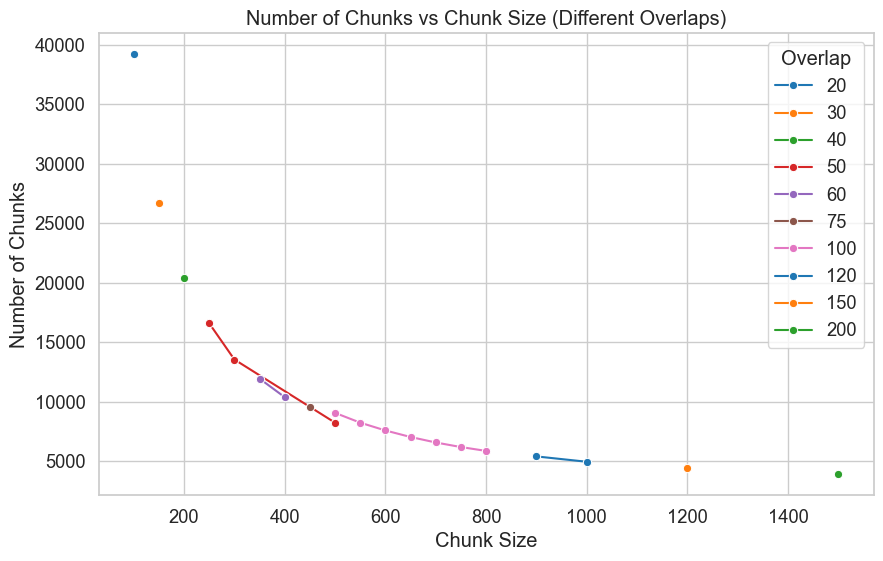

In [9]:
# Convert experiment_stats to DataFrame
df_stats = pd.DataFrame(experiment_stats)

# Set seaborn style for better aesthetics
sns.set(style="whitegrid", font_scale=1.2)
custom_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]

# Plot 1: Number of Chunks vs Chunk Size
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_stats,
    x="chunk_size",
    y="num_chunks",
    hue="overlap",
    marker="o",
    palette=custom_colors,
)
plt.title("Number of Chunks vs Chunk Size (Different Overlaps)")
plt.xlabel("Chunk Size")
plt.ylabel("Number of Chunks")
plt.legend(title="Overlap")
plt.show()

C:\Users\tejpa\AppData\Local\Temp\ipykernel_2344\1417432902.py:3: UserWarning: 
The palette list has fewer values (7) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(


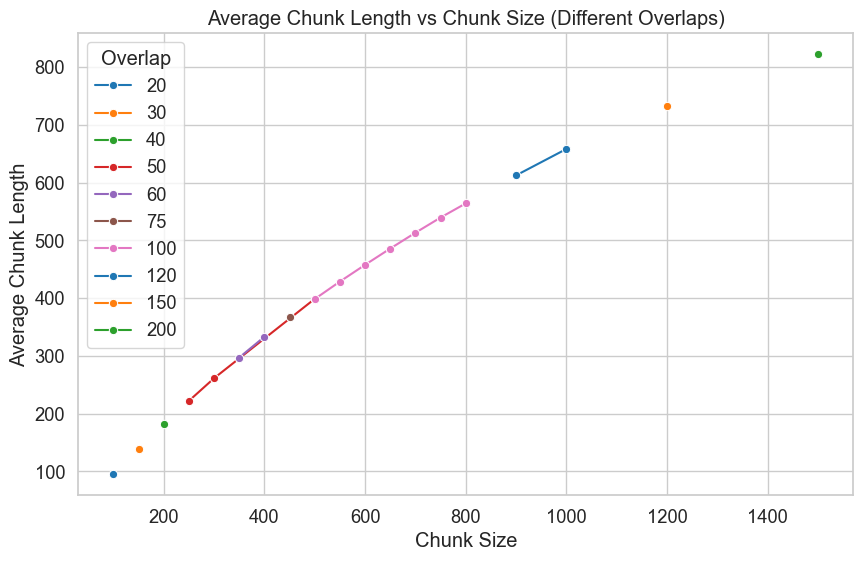

In [10]:
# Plot 2: Average Chunk Length vs Chunk Size
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_stats,
    x="chunk_size",
    y="avg_chunk_length",
    hue="overlap",
    marker="o",
    palette=custom_colors
)
plt.title("Average Chunk Length vs Chunk Size (Different Overlaps)")
plt.xlabel("Chunk Size")
plt.ylabel("Average Chunk Length")
plt.legend(title="Overlap")
plt.show()

## 7. Observations & Conclusion

After conducting a series of chunking experiments, we've observed several key trends and insights that inform best practices for chunk size and overlap in Retrieval-Augmented Generation (RAG) systems.

### 1. Effect of Chunk Size

- **Smaller chunk sizes (100–300 characters):**

  - **Advantages:**
    - Provide **higher granularity**, beneficial for fine-grained retrieval tasks.
    - Facilitate precise matching, especially for fact-based queries.
  - **Disadvantages:**
    - Result in a **larger number of chunks**, increasing embedding and storage costs.
    - May lead to **loss of context**, as chunks might not capture sufficient surrounding information.

- **Medium chunk sizes (300–500 characters):**

  - **Advantages:**
    - Offer a **balanced trade-off** between context preservation and retrieval granularity.
    - Suitable for general-purpose RAG applications.
  - **Disadvantages:**
    - Still result in a moderate number of chunks, though more manageable than smaller sizes.

- **Larger chunk sizes (600–1500 characters):**
  - **Advantages:**
    - Preserve **longer context**, which can be advantageous for complex queries requiring multi-sentence reasoning.
    - Reduce the total number of chunks, lowering embedding and storage costs.
  - **Disadvantages:**
    - Risk of including **irrelevant content**, potentially reducing retrieval precision.
    - May lead to **increased retrieval latency** due to larger chunk sizes.

### 2. Effect of Overlap

- **Smaller overlaps (20–50 characters):**

  - **Advantages:**
    - Reduce redundancy between consecutive chunks.
    - Lower storage and embedding costs.
  - **Disadvantages:**
    - May break **semantic continuity**, especially for sentences spanning chunk boundaries.

- **Larger overlaps (100–200 characters):**
  - **Advantages:**
    - Preserve **context across chunks**, ensuring important sentences or terms aren’t split.
    - Improve **retrieval quality** for queries that rely on contextual understanding.
  - **Disadvantages:**
    - Slightly increase storage and computational costs due to redundant text.

### 3. Trade-offs

- **Granularity vs Cost:**

  - Smaller chunks → better for precise retrieval but increase embeddings and storage cost.
  - Larger chunks → fewer embeddings but potential loss in retrieval precision due to extra irrelevant content.

- **Context vs Redundancy:**
  - Larger overlaps → better context retention but higher redundancy.
  - Smaller overlaps → lower redundancy but may lose context across chunk boundaries.

### 4. Recommended Baseline

Based on the experiments and visualizations, a good starting point for **initial RAG experiments** is:

- **Chunk Size:** 500 characters
- **Overlap:** 100 characters

This configuration balances:

- Adequate context for retrieval
- Manageable number of chunks
- Reasonable embedding and storage costs

### 5. Next Steps

- Use the selected baseline to **generate embeddings** for all chunks.
- Store embeddings in **ChromaDB or FAISS**.
- Begin **building concept graphs** for explainability.
- Fine-tune chunking parameters further if retrieval performance requires optimization.

---

**Summary:**  
This experiment helps in making **data-driven decisions** about chunking strategy, ensuring that downstream RAG and concept graph modules perform effectively while keeping resource usage under control.


## 8. Reference: Research on Chunk Size in RAG

To support our findings, we refer to a research study that systematically evaluates the impact of chunk sizes on retrieval performance in RAG applications:

**Paper:** "Evaluating the Optimal Document Chunk Size for a RAG Application"  
**Author:** Harshad Suryawanshi  
**Published:** 2024  
**Source:** [Medium Article](https://harshadsuryawanshi.medium.com/evaluating-the-optimal-document-chunk-size-for-a-rag-application-9cb482365bbf)

**Key Insights:**

- **Smaller chunk sizes (e.g., 25 tokens):**

  - Higher **precision** in retrieval due to fine-grained matching.
  - Risk of **loss of context**, leading to incomplete answers.

- **Medium chunk sizes (e.g., 200 tokens):**

  - Balanced **context relevancy**, capturing sufficient information for accurate retrieval.
  - Suitable for tasks requiring both precision and context.

- **Larger chunk sizes (e.g., 1024 tokens):**
  - Broader **context coverage**, beneficial for complex queries.
  - Risk of **redundancy** and decreased retrieval efficiency.

**Takeaway:**  
The study reinforces our experimental observation: choosing the right chunk size is a **trade-off between granularity, context preservation, and computational efficiency**. For initial RAG experiments, medium chunk sizes with moderate overlap often provide the best balance.
